Import all libralies

In [3]:
#datascience libralies
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import os
#manage data with sklearn libralies 
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.utils import to_categorical
from IPython.core.display import display
#ai libralies 
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

read dataset

In [4]:
df_train = pd.read_csv("df_newfn.csv")
df_test = pd.read_csv("dataset/fulltest.csv")

In [5]:
df_train

,MOFname,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,...,summetallinker_c,sumothermetallinker,sumorganiclinker_atom1,sumorganiclinker_h1,sumorganiclinker_c1,sumotherorganiclinker1,sumorganiclinker_atom2,sumorganiclinker_h2,sumorganiclinker_c2,sumotherorganiclinker2
0,mof_unit_2,2769.503842,1.326090,2211.697211,603.6100,0.137940,0.104000,F-OMe,10,44,...,0,2,20,6,14,0,40,10,30,0
1,mof_unit_3,1089.818728,1.178856,773.687960,788.5000,0.148740,0.126200,OMe-COOH,2,22,...,6,0,20,12,8,0,14,6,8,0
2,mof_unit_4,2205.198301,0.982408,1304.638720,1441.5300,0.218140,0.222000,H-SO3H,9,17,...,4,2,24,8,16,0,14,6,8,0
3,mof_unit_6,3954.659761,0.647909,1543.027680,2430.5500,0.370940,0.572500,Pr-NO2,9,7,...,4,2,22,8,14,0,24,12,12,0
4,mof_unit_7,3565.914939,0.910268,1954.749656,1530.0200,0.333370,0.366200,NH2,10,53,...,0,2,42,10,26,6,40,14,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68283,mof_unit_68606,2112.326167,1.554544,1977.492080,666.7216,0.193031,0.122953,OPr,4,14,...,9,0,16,6,10,0,16,6,10,0
68284,mof_unit_68607,949.067112,1.318868,753.787520,1269.8833,0.302090,0.204770,Pr,2,10,...,6,0,4,2,2,0,28,10,18,0
68285,mof_unit_68608,1202.182553,1.440028,1042.538240,1129.8825,0.267015,0.190208,Ph-Cl,3,12,...,4,2,8,4,4,0,14,6,8,0
68286,mof_unit_68609,1188.302573,1.399781,1001.700216,703.9387,0.144313,0.117899,Pr-F,3,4,...,4,2,14,6,8,0,14,6,8,0


In [6]:
df_train.columns

Index(['MOFname', 'volume [A^3]', 'density [g/cm^3]', 'weight [u]',
       'surface_area [m^2/g]', 'void_fraction', 'void_volume [cm^3/g]',
       'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]', 'cell_length_a', 'cell_length_b',
       'cell_length_c', 'cell_angle_alpha', 'cell_angle_beta',
       'cell_angle_gamma', 'Lattice1', 'Lattice2', 'Lattice3', 'Lattice4',
       'Lattice5', 'Lattice6', 'Lattice7', 'Lattice8', 'Lattice9', 'C+O+H',
       'C', 'O', 'H', 'sumatom', 'mean_charge', 'sum_charge',
       'summetallinker_atom', 'summetallinker_o', 'summetallinker_c',
       'sumothermetallinker', 'sumorganiclinker_atom1', 'sumorganiclinker_h1',
       'sumorganiclinker_c1', 'sumotherorganiclinker1',
       'sumorganiclinker_atom2', 'sumorganiclinker_h2', 'sumorganiclinker_c2',
       'sumotherorganiclinker2'],
      dtype='ob

Lab features

select features

In [7]:
df_train.columns

Index(['MOFname', 'volume [A^3]', 'density [g/cm^3]', 'weight [u]',
       'surface_area [m^2/g]', 'void_fraction', 'void_volume [cm^3/g]',
       'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]', 'cell_length_a', 'cell_length_b',
       'cell_length_c', 'cell_angle_alpha', 'cell_angle_beta',
       'cell_angle_gamma', 'Lattice1', 'Lattice2', 'Lattice3', 'Lattice4',
       'Lattice5', 'Lattice6', 'Lattice7', 'Lattice8', 'Lattice9', 'C+O+H',
       'C', 'O', 'H', 'sumatom', 'mean_charge', 'sum_charge',
       'summetallinker_atom', 'summetallinker_o', 'summetallinker_c',
       'sumothermetallinker', 'sumorganiclinker_atom1', 'sumorganiclinker_h1',
       'sumorganiclinker_c1', 'sumotherorganiclinker1',
       'sumorganiclinker_atom2', 'sumorganiclinker_h2', 'sumorganiclinker_c2',
       'sumotherorganiclinker2'],
      dtype='ob

In [8]:
df_train.insert(
    loc=0,
    column='difatom',
    value=df_train['sumatom']-df_train['C+O+H']
)
df_train.insert(
    loc=0,
    column='surface_to_volume',
    value=df_train['surface_area [m^2/g]']/df_train['volume [A^3]']
)
df_train.insert(
    loc=0,
    column='cubic_surface_area',
    value=((df_train['volume [A^3]']**(1/3))**2)*6
)

In [9]:
df_train.columns

Index(['cubic_surface_area', 'surface_to_volume', 'difatom', 'MOFname',
       'volume [A^3]', 'density [g/cm^3]', 'weight [u]',
       'surface_area [m^2/g]', 'void_fraction', 'void_volume [cm^3/g]',
       'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]', 'cell_length_a', 'cell_length_b',
       'cell_length_c', 'cell_angle_alpha', 'cell_angle_beta',
       'cell_angle_gamma', 'Lattice1', 'Lattice2', 'Lattice3', 'Lattice4',
       'Lattice5', 'Lattice6', 'Lattice7', 'Lattice8', 'Lattice9', 'C+O+H',
       'C', 'O', 'H', 'sumatom', 'mean_charge', 'sum_charge',
       'summetallinker_atom', 'summetallinker_o', 'summetallinker_c',
       'sumothermetallinker', 'sumorganiclinker_atom1', 'sumorganiclinker_h1',
       'sumorganiclinker_c1', 'sumotherorganiclinker1',
       'sumorganiclinker_atom2', 'sumorganiclinker_h2', 'sumorganic

In [10]:
def check_in(pattern : str, loop : list or np.ndarray or None = df_train.functional_groups):
    return [int(pattern in str(x).split('-') )for x in loop]

def count_in(pattern : str, loop : list or np.ndarray or None = df_train.functional_groups):
    return [str(x).count(pattern) for x in loop]

compounds = set(['SO3H','COOH','NH2','OH','CN','F','OMe','NHMe','NO2','Pr','Cl','OEt','Ph','Br','OPr','HCO','Et','Me','H','I'])
molecules = set(['N','O','C'])

func_data = {
    f'funccheck_{compound}':check_in(compound)
    for compound in compounds
}
func_data.update({
    f'funccount_{molecule}':count_in(molecule)
    for molecule in molecules
})
func_data.update({
    'num_func': [int('-' in str(x)) for x in df_train.functional_groups]
})

df_train.functional_groups = df_train.functional_groups.astype("category").cat.codes
func_df_train = pd.DataFrame(func_data);func_df_train


,funccheck_NHMe,funccheck_OEt,funccheck_Ph,funccheck_CN,funccheck_H,funccheck_SO3H,funccheck_OMe,funccheck_I,funccheck_HCO,funccheck_OH,...,funccheck_OPr,funccheck_NH2,funccheck_NO2,funccheck_Me,funccheck_Cl,funccheck_F,funccount_O,funccount_C,funccount_N,num_func
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,3,1,0,1
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68283,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
68284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68285,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
68286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
#split features 
basic_features = [
'volume [A^3]', 
'density [g/cm^3]', 
'weight [u]',
'surface_area [m^2/g]',
'void_fraction', 
'void_volume [cm^3/g]'
]

function_features = [
'functional_groups',
'metal_linker',
'organic_linker1',
'organic_linker2',
'topology',
'CO2/N2_selectivity',
'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']

cell_features = [
'cell_length_a',
'cell_length_b',
'cell_length_c',
'cell_angle_alpha',
'cell_angle_beta',
'cell_angle_gamma']

lattice_features = [
'Lattice1',
'Lattice2',
'Lattice3',
'Lattice4',
'Lattice5',
'Lattice6',
'Lattice7',
'Lattice8',
'Lattice9'
]

atom_features = [
'C+O+H',
'C', 
'O', 
'H', 
'sumatom', 
'mean_charge', 
'sum_charge'
]

linker_features = [ 
'summetallinker_atom', 
'summetallinker_o', 
'summetallinker_c',
'sumothermetallinker', 
'sumorganiclinker_atom1', 
'sumorganiclinker_h1',
'sumorganiclinker_c1', 
'sumotherorganiclinker1',
'sumorganiclinker_atom2', 
'sumorganiclinker_h2', 
'sumorganiclinker_c2',
'sumotherorganiclinker2'
]
add_features= [ 
'cubic_surface_area', 
'surface_to_volume', 
'difatom' 
]

In [12]:
metal_linker_int = df_train['metal_linker']-1
metal_one_hot = to_categorical(metal_linker_int,num_classes=12,dtype='int8')
metal_onehot_df_train = pd.DataFrame(metal_one_hot,columns=['ml_' + str(num) for num in range(1,13)])
display(metal_onehot_df_train.head(2))
#---------------------------------------
org1_int = df_train['organic_linker1']-1
org1_one_hot = to_categorical(org1_int,num_classes=59,dtype='int8')
org1_onehot_df_train = pd.DataFrame(org1_one_hot,columns=['ol1_' + str(num) for num in range(1,60)])
display(org1_onehot_df_train.head(2))
#--------------------------------------
org2_int = df_train['organic_linker2']-1
org2_one_hot = to_categorical(org2_int,num_classes=59,dtype='int8')
org2_onehot_df_train = pd.DataFrame(org2_one_hot,columns=['ol2_' + str(num) for num in range(1,60)])
display(org2_onehot_df_train.head(2))
#--------------------------------------
top_int = df_train['topology']
top_one_hot = to_categorical(top_int,dtype='int8')
top_onehot_df_train = pd.DataFrame(top_one_hot,columns=['top_' + str(num) for num in range(0,11)])
display(top_onehot_df_train.head(2))

,ml_1,ml_2,ml_3,ml_4,ml_5,ml_6,ml_7,ml_8,ml_9,ml_10,ml_11,ml_12
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0


,ol1_1,ol1_2,ol1_3,ol1_4,ol1_5,ol1_6,ol1_7,ol1_8,ol1_9,ol1_10,...,ol1_50,ol1_51,ol1_52,ol1_53,ol1_54,ol1_55,ol1_56,ol1_57,ol1_58,ol1_59
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ol2_1,ol2_2,ol2_3,ol2_4,ol2_5,ol2_6,ol2_7,ol2_8,ol2_9,ol2_10,...,ol2_50,ol2_51,ol2_52,ol2_53,ol2_54,ol2_55,ol2_56,ol2_57,ol2_58,ol2_59
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0


In [13]:
df_train.columns

Index(['cubic_surface_area', 'surface_to_volume', 'difatom', 'MOFname',
       'volume [A^3]', 'density [g/cm^3]', 'weight [u]',
       'surface_area [m^2/g]', 'void_fraction', 'void_volume [cm^3/g]',
       'functional_groups', 'metal_linker', 'organic_linker1',
       'organic_linker2', 'topology', 'CO2/N2_selectivity',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'CO2_working_capacity [mL/g]', 'cell_length_a', 'cell_length_b',
       'cell_length_c', 'cell_angle_alpha', 'cell_angle_beta',
       'cell_angle_gamma', 'Lattice1', 'Lattice2', 'Lattice3', 'Lattice4',
       'Lattice5', 'Lattice6', 'Lattice7', 'Lattice8', 'Lattice9', 'C+O+H',
       'C', 'O', 'H', 'sumatom', 'mean_charge', 'sum_charge',
       'summetallinker_atom', 'summetallinker_o', 'summetallinker_c',
       'sumothermetallinker', 'sumorganiclinker_atom1', 'sumorganiclinker_h1',
       'sumorganiclinker_c1', 'sumotherorganiclinker1',
       'sumorganiclinker_atom2', 'sumorganiclinker_h2', 'sumorganic

In [14]:
df_train_data = pd.concat([df_train[basic_features]
                           ,df_train[function_features], 
                           df_train[cell_features], 
                           df_train[lattice_features],
                           df_train[atom_features],
                           df_train[linker_features],
                           df_train[add_features],
                           metal_onehot_df_train,
                           org1_onehot_df_train,
                           org2_onehot_df_train,
                           top_onehot_df_train, 
                           func_df_train
                           ],axis=1
                           )
df_train_label = df_train["CO2_working_capacity [mL/g]"]

In [15]:
df_train_label

0        101.224774
1        118.987011
2        187.626004
3         55.786959
4        111.690462
            ...    
68283     -7.204436
68284     -9.124771
68285    -10.954315
68286    -12.943652
68287    -13.187635
Name: CO2_working_capacity [mL/g], Length: 68288, dtype: float64

In [16]:
df_train_data

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,funccheck_OPr,funccheck_NH2,funccheck_NO2,funccheck_Me,funccheck_Cl,funccheck_F,funccount_O,funccount_C,funccount_N,num_func
0,2769.503842,1.326090,2211.697211,603.6100,0.137940,0.104000,115,10,44,57,...,0,0,0,0,0,1,1,0,0,1
1,1089.818728,1.178856,773.687960,788.5000,0.148740,0.126200,303,2,22,24,...,0,0,0,0,0,0,3,1,0,1
2,2205.198301,0.982408,1304.638720,1441.5300,0.218140,0.222000,139,9,17,24,...,0,0,0,0,0,0,1,0,0,1
3,3954.659761,0.647909,1543.027680,2430.5500,0.370940,0.572500,373,9,7,23,...,0,0,1,0,0,0,1,0,1,1
4,3565.914939,0.910268,1954.749656,1530.0200,0.333370,0.366200,200,10,53,55,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68283,2112.326167,1.554544,1977.492080,666.7216,0.193031,0.122953,320,4,14,14,...,1,0,0,0,0,0,1,0,0,0
68284,949.067112,1.318868,753.787520,1269.8833,0.302090,0.204770,360,2,10,18,...,0,0,0,0,0,0,0,0,0,0
68285,1202.182553,1.440028,1042.538240,1129.8825,0.267015,0.190208,344,3,12,24,...,0,0,0,0,1,0,0,1,0,1
68286,1188.302573,1.399781,1001.700216,703.9387,0.144313,0.117899,366,3,4,24,...,0,0,0,0,0,1,0,0,0,1


In [17]:
df_train_data

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,funccheck_OPr,funccheck_NH2,funccheck_NO2,funccheck_Me,funccheck_Cl,funccheck_F,funccount_O,funccount_C,funccount_N,num_func
0,2769.503842,1.326090,2211.697211,603.6100,0.137940,0.104000,115,10,44,57,...,0,0,0,0,0,1,1,0,0,1
1,1089.818728,1.178856,773.687960,788.5000,0.148740,0.126200,303,2,22,24,...,0,0,0,0,0,0,3,1,0,1
2,2205.198301,0.982408,1304.638720,1441.5300,0.218140,0.222000,139,9,17,24,...,0,0,0,0,0,0,1,0,0,1
3,3954.659761,0.647909,1543.027680,2430.5500,0.370940,0.572500,373,9,7,23,...,0,0,1,0,0,0,1,0,1,1
4,3565.914939,0.910268,1954.749656,1530.0200,0.333370,0.366200,200,10,53,55,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68283,2112.326167,1.554544,1977.492080,666.7216,0.193031,0.122953,320,4,14,14,...,1,0,0,0,0,0,1,0,0,0
68284,949.067112,1.318868,753.787520,1269.8833,0.302090,0.204770,360,2,10,18,...,0,0,0,0,0,0,0,0,0,0
68285,1202.182553,1.440028,1042.538240,1129.8825,0.267015,0.190208,344,3,12,24,...,0,0,0,0,1,0,0,1,0,1
68286,1188.302573,1.399781,1001.700216,703.9387,0.144313,0.117899,366,3,4,24,...,0,0,0,0,0,1,0,0,0,1


scale and split data to train, test

In [18]:
numpy_train_data = np.array(df_train_data)
numpy_train_label = np.array(df_train_label)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(numpy_train_data,numpy_train_label,test_size=0.1,random_state=444)

In [22]:
x_train[1]

array([ 1.64302301e+03,  1.25725764e+00,  1.24399487e+03,  8.94375600e+02,
        1.15100000e-01,  9.15000000e-02,  3.06000000e+02,  2.00000000e+00,
        2.20000000e+01,  2.30000000e+01,  5.00000000e+00,  2.18455582e+01,
        6.11568600e+00,  1.08838000e+01,  9.53999000e+00,  1.58329000e+01,
        8.98257000e+01,  8.89012000e+01,  8.84037000e+01,  1.08838450e+01,
        2.65751530e-01,  9.53629482e+00,  3.03606668e-01,  3.97097511e-02,
        1.58300260e+01,  1.24000000e+02,  4.60000000e+01,  2.20000000e+01,
        5.60000000e+01,  1.34000000e+02, -2.99000000e-08, -4.00000000e-06,
        1.40000000e+01,  8.00000000e+00,  6.00000000e+00,  0.00000000e+00,
        2.00000000e+01,  1.20000000e+01,  8.00000000e+00,  0.00000000e+00,
        2.40000000e+01,  1.20000000e+01,  1.20000000e+01,  0.00000000e+00,
        8.35436953e+02,  5.44347580e-01,  1.00000000e+01,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

select model to train 

In [ ]:
#define model
tree = DecisionTreeRegressor()
forrest = RandomForestRegressor()
xgboost = xgb.XGBRFRegressor()
linear = LinearRegression()

In [ ]:
linear.fit(x_train,y_train)
tree.fit(x_train,y_train)
forrest.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

In [ ]:
scorelinear = linear.predict(x_test)
scoretree = tree.predict(x_test)
scoreforrest = forrest.predict(x_test)
scorexgboost = xgboost.predict(x_test)

In [ ]:
log_score_linear = np.log(mean_absolute_error(scorelinear, y_test))
log_score_tree = np.log(mean_absolute_error(scoretree, y_test))
log_score_forrest = np.log(mean_absolute_error(scoreforrest, y_test))
log_score_xgboost = np.log(mean_absolute_error(scorexgboost, y_test))

In [ ]:
print("linear score =", log_score_linear)
print("tree score =", log_score_tree)
print("forrest score =", log_score_forrest)
print("xgboost score =", log_score_xgboost)

linear score = 3.7053344677764057
tree score = 3.385158205268858
forrest score = 3.0207847523522386
xgboost score = 3.2473903911904256


In [ ]:
test_model = DecisionTreeRegressor()
test_model.fit(x_train,y_train)
test_score = test_model.predict(x_test)
log_score_test = np.log(mean_absolute_error(test_score, y_test))
log_score_test

3.379245186384204

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
scoretree = tree.predict(x_test)

In [ ]:
log_score_tree = np.log10(mean_absolute_error(scoretree, y_test))
log_score_tree

1.4721878552588372

In [ ]:
sf = SelectFromModel(tree,prefit=True)
new_train_data = sf.transform(df_train_data)

In [ ]:
new_train_data.shape

(68288, 12)

In [ ]:
x_trainnew, x_testnew, y_trainnew, y_testnew = train_test_split(new_train_data,numpy_train_label,test_size=0.1,random_state=444)

use randomforrest

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 2000, num = 10)]
max_features = [
#'auto',
'sqrt'
]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1000, 1111, 1222, 1333, 1444, 1555, 1666, 1777, 1888, 2000], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
forrest = RandomForestRegressor()
best_forrest = RandomizedSearchCV(estimator = forrest, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=0, n_jobs = -1)
best_forrest.fit(x_train,y_train)
best_forrest.best_estimator_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=1333)

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=1333)

In [ ]:
best_forrestscore = best_forrest.predict(x_test)
forest_log_mae = np.log(mean_absolute_error(best_forrestscore, y_test))
forest_log_mae

2.967317148096521

use randomforrest

In [20]:
param_grid = {
        'eta' : [0.1],
        'min_child_weight' : [0],
        'max_depth' :[10],
        'colsample_bytree' :[0.8],
        'subsample' :[0.8],
        "num_parallel_tree": [5],
        "n_estimators" :[600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2500,3000],
        "tree_method": ['exact'],
        "verbosity" : [2],
        }

In [22]:
rs_clf = RandomizedSearchCV(xgb.XGBRegressor(), param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2, random_state=42)

In [23]:
rs_clf.fit(numpy_train_data,numpy_train_label)

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 17 is smaller than n_iter=20. Running 17 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 17 candidates, totalling 34 fits
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 982 extra nodes, 0 pruned nodes, max_depth=10
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1034 extra nodes, 0 pruned nodes, max_depth=10
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1022 extra nodes, 0 pruned nodes, max_depth=10
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1080 extra nodes, 0 pruned nodes, max_depth=10
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 998 extra nodes, 0 pruned nodes, max_depth=10
[21:15:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release

In [80]:
rs_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=20,
             min_child_weight=7.0, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=100.0, scale_pos_weight=1, silent=False,
             subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [100]:
xgboost = xgb.XGBRegressor( 
    eta = 0.1,
    min_child_weight = 0,
    max_depth =10,
    colsample_bytree =0.8,
    subsample=0.8,
    # reg_lambda = 1,
    # gamma = 200,
    num_parallel_tree=5,
    n_estimators = 600,
    tree_method='exact',
    verbosity = 2,
    )

In [101]:
xgboost.fit(x_train,y_train)

[21:08:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1048 extra nodes, 0 pruned nodes, max_depth=10
[21:08:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 996 extra nodes, 0 pruned nodes, max_depth=10
[21:08:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1060 extra nodes, 0 pruned nodes, max_depth=10
[21:08:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1164 extra nodes, 0 pruned nodes, max_depth=10
[21:08:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1196 extra nodes, 0 pruned nodes, max_depth=10
[21:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1232

Exception ignored on calling ctypes callback function: <function _log_callback at 0x0000025AB6C89430>
Traceback (most recent call last):
  File "C:\Users\Windows\anaconda3\lib\site-packages\xgboost\core.py", line 140, in _log_callback
    def _log_callback(msg):
KeyboardInterrupt: 


[21:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1368 extra nodes, 0 pruned nodes, max_depth=10
[21:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1472 extra nodes, 0 pruned nodes, max_depth=10
[21:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1498 extra nodes, 0 pruned nodes, max_depth=10
[21:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1510 extra nodes, 0 pruned nodes, max_depth=10
[21:08:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1460 extra nodes, 0 pruned nodes, max_depth=10
[21:08:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 145

Exception ignored on calling ctypes callback function: <function _log_callback at 0x0000025AB6C89430>
Traceback (most recent call last):
  File "C:\Users\Windows\anaconda3\lib\site-packages\xgboost\core.py", line 140, in _log_callback
    def _log_callback(msg):
KeyboardInterrupt: 


[21:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1198 extra nodes, 0 pruned nodes, max_depth=10
[21:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1224 extra nodes, 0 pruned nodes, max_depth=10
[21:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1208 extra nodes, 0 pruned nodes, max_depth=10
[21:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1148 extra nodes, 0 pruned nodes, max_depth=10
[21:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1224 extra nodes, 0 pruned nodes, max_depth=10
[21:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 143

In [99]:
#xgboost.fit(numpy_train_data,numpy_train_label)
best_xgbscore = rs_clf.predict(x_test)
forest_log_mae = math.log10(mean_absolute_error(best_xgbscore, y_test))
forest_log_mae

0.2552347965518713

In [27]:
xgboost.feature_importances_.shape

(187,)

In [28]:
df_train_data.columns.shape

(187,)

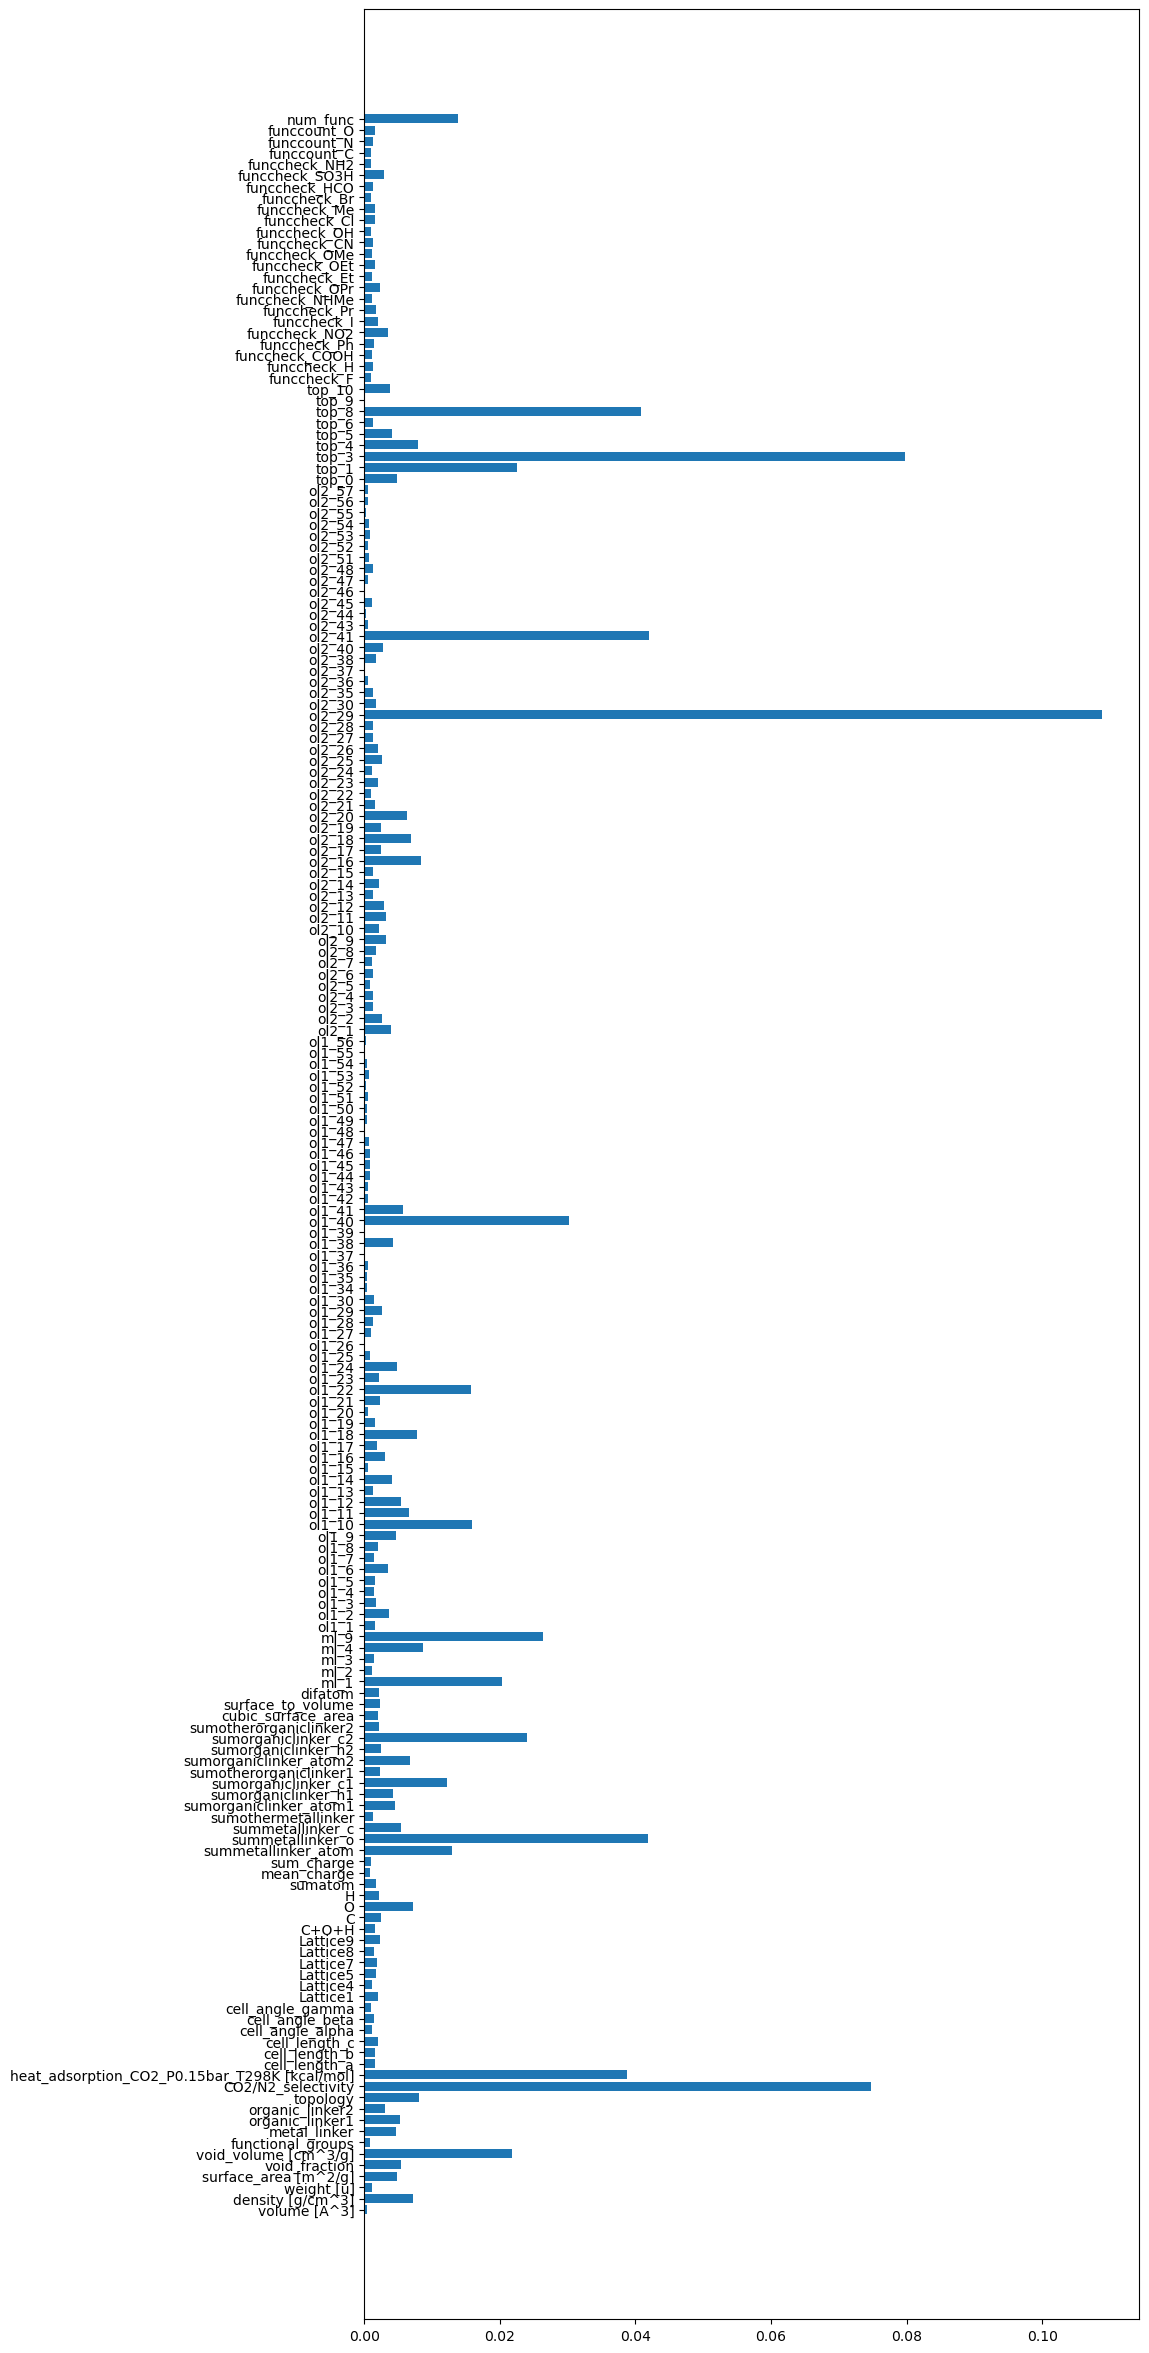

In [29]:
plt.figure(figsize=(10,30))
plt.barh(df_train_data.columns, xgboost.feature_importances_);plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler,scale
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D

In [18]:
scale_train_data = scale(numpy_train_data)

In [19]:
xt,xs,yt,ys = train_test_split(scale_train_data,numpy_train_label,random_state=123,test_size=0.1)

In [55]:
model = Sequential()
model.add(Dense(1000, input_dim=(xt.shape[1]), activation='relu')) # input
model.add(Dense(200, activation='relu')) # hidden 1
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('linear'))

In [56]:
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
model.fit(xt, yt, epochs=350, batch_size=4000)

Epoch 1/350
16/16 [==============================] - 1s 58ms/step - loss: 105.9210 - accuracy: 0.0021
Epoch 2/350
16/16 [==============================] - 1s 58ms/step - loss: 58.2288 - accuracy: 0.0000e+00
Epoch 3/350
16/16 [==============================] - 1s 58ms/step - loss: 46.5139 - accuracy: 0.0000e+00
Epoch 4/350
16/16 [==============================] - 1s 58ms/step - loss: 41.0765 - accuracy: 8.2982e-04
Epoch 5/350
16/16 [==============================] - 1s 58ms/step - loss: 36.6263 - accuracy: 0.0141
Epoch 6/350
16/16 [==============================] - 1s 58ms/step - loss: 33.8082 - accuracy: 0.0221
Epoch 7/350
16/16 [==============================] - 1s 58ms/step - loss: 32.2578 - accuracy: 0.0233
Epoch 8/350
16/16 [==============================] - 1s 58ms/step - loss: 31.1878 - accuracy: 0.0229
Epoch 9/350
16/16 [==============================] - 1s 58ms/step - loss: 30.3358 - accuracy: 0.0223
Epoch 10/350
16/16 [==============================] - 1s 58ms/step - loss: 29.

In [57]:
nn_xgbscore = model.predict(xs)
nn_log_mae = np.log10(mean_absolute_error(nn_xgbscore, ys))
nn_log_mae

1.2794312862808308

In [80]:
nn_xgbscore

array([[-0.6149812],
       [ 0.093604 ],
       [ 0.3234847],
       ...,
       [ 0.6153871],
       [ 1.1181679],
       [-1.1826195]], dtype=float32)

In [81]:
ys

array([-0.70515908, -0.02170051,  0.37949658, ...,  0.67953598,
        1.24546641, -1.34255948])

2.9195723103487055

savemodel

In [ ]:
xgboost.save_model("2.914.json")

In [ ]:
xgboost.load_model("model/all.json")

predict test

In [82]:
df_test.drop(["MOFname"],axis=1,inplace=True)

In [83]:
df_test

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,summetallinker_c,sumothermetallinker,sumorganiclinker_atom1,sumorganiclinker_h1,sumorganiclinker_c1,sumotherorganiclinker1,sumorganiclinker_atom2,sumorganiclinker_h2,sumorganiclinker_c2,sumotherorganiclinker2
0,1208.301332,1.096273,797.70936,586.54,0.11392,0.1039,OEt,2,5,26,...,6,0,2,0,2,0,24,10,14,0
1,4126.414623,1.502488,3733.65779,852.49,0.21367,0.1422,H-I,4,6,17,...,9,0,14,4,10,0,24,8,16,0
2,1602.148373,0.774443,747.21048,3155.73,0.33883,0.4375,CN-OH,3,11,17,...,4,2,8,4,4,0,24,8,16,0
3,2436.629312,0.678630,995.80232,3521.09,0.40464,0.5963,OMe,2,1,28,...,6,0,10,4,6,0,44,12,26,6
4,3123.418006,0.711091,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,8,19,...,4,2,22,8,12,2,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,32660.944610,0.240160,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,3,14,...,4,2,30,12,18,0,16,6,10,0
16996,5070.998617,0.490903,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,1,11,...,4,2,10,4,6,0,8,4,4,0
16997,4669.804446,0.470109,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,7,23,...,6,0,22,8,14,0,24,12,12,0
16998,4682.120862,0.430379,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,7,25,...,4,2,22,8,14,0,18,6,12,0


In [84]:
col = ["topology"]
for i in col:
    df_test[i] = df_test[i].astype("category").cat.codes


In [85]:
df_test

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,summetallinker_c,sumothermetallinker,sumorganiclinker_atom1,sumorganiclinker_h1,sumorganiclinker_c1,sumotherorganiclinker1,sumorganiclinker_atom2,sumorganiclinker_h2,sumorganiclinker_c2,sumotherorganiclinker2
0,1208.301332,1.096273,797.70936,586.54,0.11392,0.1039,OEt,2,5,26,...,6,0,2,0,2,0,24,10,14,0
1,4126.414623,1.502488,3733.65779,852.49,0.21367,0.1422,H-I,4,6,17,...,9,0,14,4,10,0,24,8,16,0
2,1602.148373,0.774443,747.21048,3155.73,0.33883,0.4375,CN-OH,3,11,17,...,4,2,8,4,4,0,24,8,16,0
3,2436.629312,0.678630,995.80232,3521.09,0.40464,0.5963,OMe,2,1,28,...,6,0,10,4,6,0,44,12,26,6
4,3123.418006,0.711091,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,8,19,...,4,2,22,8,12,2,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,32660.944610,0.240160,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,3,14,...,4,2,30,12,18,0,16,6,10,0
16996,5070.998617,0.490903,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,1,11,...,4,2,10,4,6,0,8,4,4,0
16997,4669.804446,0.470109,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,7,23,...,6,0,22,8,14,0,24,12,12,0
16998,4682.120862,0.430379,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,7,25,...,4,2,22,8,14,0,18,6,12,0


In [86]:
df_test.head(3)

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,summetallinker_c,sumothermetallinker,sumorganiclinker_atom1,sumorganiclinker_h1,sumorganiclinker_c1,sumotherorganiclinker1,sumorganiclinker_atom2,sumorganiclinker_h2,sumorganiclinker_c2,sumotherorganiclinker2
0,1208.301332,1.096273,797.70936,586.54,0.11392,0.1039,OEt,2,5,26,...,6,0,2,0,2,0,24,10,14,0
1,4126.414623,1.502488,3733.65779,852.49,0.21367,0.1422,H-I,4,6,17,...,9,0,14,4,10,0,24,8,16,0
2,1602.148373,0.774443,747.21048,3155.73,0.33883,0.4375,CN-OH,3,11,17,...,4,2,8,4,4,0,24,8,16,0


In [88]:
df_test.insert(
    loc=0,
    column='difatom',
    value=df_test['sumatom']-df_test['C+O+H']
)
df_test.insert(
    loc=0,
    column='surface_to_volume',
    value=df_test['surface_area [m^2/g]']/df_test['volume [A^3]']
)
df_test.insert(
    loc=0,
    column='cubic_surface_area',
    value=((df_test['volume [A^3]']**(1/3))**2)*6
)

In [89]:
metal_linker_int = df_test['metal_linker']-1
metal_one_hot = to_categorical(metal_linker_int,num_classes=12,dtype='int8')
metal_onehot_df_test = pd.DataFrame(metal_one_hot,columns=['ml_' + str(num) for num in range(1,13)])
display(metal_onehot_df_test.head(2))
#---------------------------------------
org1_int = df_test['organic_linker1']-1
org1_one_hot = to_categorical(org1_int,num_classes=59,dtype='int8')
org1_onehot_df_test = pd.DataFrame(org1_one_hot,columns=['ol1_' + str(num) for num in range(1,60)])
display(org1_onehot_df_test.head(2))
#--------------------------------------
org2_int = df_test['organic_linker2']-1
org2_one_hot = to_categorical(org2_int,num_classes=59,dtype='int8')
org2_onehot_df_test = pd.DataFrame(org2_one_hot,columns=['ol2_' + str(num) for num in range(1,60)])
display(org2_onehot_df_test.head(2))
#--------------------------------------
top_int = df_test['topology']
top_one_hot = to_categorical(top_int,dtype='int8')
top_onehot_df_test = pd.DataFrame(top_one_hot,columns=['top_' + str(num) for num in range(0,11)])
display(top_onehot_df_test.head(2))

,ml_1,ml_2,ml_3,ml_4,ml_5,ml_6,ml_7,ml_8,ml_9,ml_10,ml_11,ml_12
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0


,ol1_1,ol1_2,ol1_3,ol1_4,ol1_5,ol1_6,ol1_7,ol1_8,ol1_9,ol1_10,...,ol1_50,ol1_51,ol1_52,ol1_53,ol1_54,ol1_55,ol1_56,ol1_57,ol1_58,ol1_59
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ol2_1,ol2_2,ol2_3,ol2_4,ol2_5,ol2_6,ol2_7,ol2_8,ol2_9,ol2_10,...,ol2_50,ol2_51,ol2_52,ol2_53,ol2_54,ol2_55,ol2_56,ol2_57,ol2_58,ol2_59
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [90]:
def check_in(pattern : str, loop : list or np.ndarray or None = df_test.functional_groups):
    return [int(pattern in str(x).split('-') )for x in loop]

def count_in(pattern : str, loop : list or np.ndarray or None = df_test.functional_groups):
    return [str(x).count(pattern) for x in loop]

compounds = set(['SO3H','COOH','NH2','OH','CN','F','OMe','NHMe','NO2','Pr','Cl','OEt','Ph','Br','OPr','HCO','Et','Me','H','I'])
molecules = set(['N','O','C'])

func_data = {
    f'funccheck_{compound}':check_in(compound)
    for compound in compounds
}
func_data.update({
    f'funccount_{molecule}':count_in(molecule)
    for molecule in molecules
})
func_data.update({
    'num_func': [int('-' in str(x)) for x in df_test.functional_groups]
})

df_test.functional_groups = df_test.functional_groups.astype("category").cat.codes
func_df_test = pd.DataFrame(func_data);func_df_test

,funccheck_COOH,funccheck_NH2,funccheck_OPr,funccheck_H,funccheck_NHMe,funccheck_Et,funccheck_CN,funccheck_Br,funccheck_OEt,funccheck_OH,...,funccheck_OMe,funccheck_Pr,funccheck_Cl,funccheck_I,funccheck_Me,funccheck_HCO,funccount_N,funccount_O,funccount_C,num_func
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,2,0,1
16996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
16997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1
16998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,2,1,1


In [91]:
df_test_new = pd.concat([df_test[basic_features],
                           df_test[function_features],
                           df_test[cell_features],
                           df_test[lattice_features], 
                           df_test[atom_features],
                           df_test[linker_features],
                           df_test[add_features]
                           ,metal_onehot_df_test,
                           org1_onehot_df_test,
                           org2_onehot_df_test,
                           top_onehot_df_test, 
                           func_df_test
                           ],axis=1
                           )

In [92]:
df_test_new

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,funccheck_OMe,funccheck_Pr,funccheck_Cl,funccheck_I,funccheck_Me,funccheck_HCO,funccount_N,funccount_O,funccount_C,num_func
0,1208.301332,1.096273,797.70936,586.54,0.11392,0.1039,260,2,5,26,...,0,0,0,0,0,0,0,1,0,0
1,4126.414623,1.502488,3733.65779,852.49,0.21367,0.1422,128,4,6,17,...,0,0,0,1,0,0,0,0,0,1
2,1602.148373,0.774443,747.21048,3155.73,0.33883,0.4375,34,3,11,17,...,0,0,0,0,0,0,1,1,1,1
3,2436.629312,0.678630,995.80232,3521.09,0.40464,0.5963,300,2,1,28,...,1,0,0,0,0,0,0,1,0,0
4,3123.418006,0.711091,1337.53800,2678.46,0.38959,0.5479,258,3,8,19,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,32660.944610,0.240160,4723.68288,5720.14,0.77614,3.2318,293,3,3,14,...,0,0,0,0,0,0,1,2,0,1
16996,5070.998617,0.490903,1499.13262,4017.28,0.59192,1.2058,195,3,1,11,...,1,0,0,0,1,0,0,1,0,1
16997,4669.804446,0.470109,1322.04892,4288.76,0.54950,1.1689,182,2,7,23,...,0,0,0,0,1,0,1,0,1,1
16998,4682.120862,0.430379,1213.51148,4331.86,0.60643,1.4091,288,3,7,25,...,0,0,0,0,0,1,0,2,1,1


In [93]:
df_train_data

,volume [A^3],density [g/cm^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,...,funccheck_OMe,funccheck_Pr,funccheck_Cl,funccheck_I,funccheck_Me,funccheck_HCO,funccount_N,funccount_O,funccount_C,num_func
0,2769.503842,1.326090,2211.697211,603.6100,0.137940,0.104000,115,10,44,57,...,1,0,0,0,0,0,0,1,0,1
1,1089.818728,1.178856,773.687960,788.5000,0.148740,0.126200,303,2,22,24,...,1,0,0,0,0,0,0,3,1,1
2,2205.198301,0.982408,1304.638720,1441.5300,0.218140,0.222000,139,9,17,24,...,0,0,0,0,0,0,0,1,0,1
3,3954.659761,0.647909,1543.027680,2430.5500,0.370940,0.572500,373,9,7,23,...,0,1,0,0,0,0,1,1,0,1
4,3565.914939,0.910268,1954.749656,1530.0200,0.333370,0.366200,200,10,53,55,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68283,2112.326167,1.554544,1977.492080,666.7216,0.193031,0.122953,320,4,14,14,...,0,0,0,0,0,0,0,1,0,0
68284,949.067112,1.318868,753.787520,1269.8833,0.302090,0.204770,360,2,10,18,...,0,1,0,0,0,0,0,0,0,0
68285,1202.182553,1.440028,1042.538240,1129.8825,0.267015,0.190208,344,3,12,24,...,0,0,1,0,0,0,0,0,1,1
68286,1188.302573,1.399781,1001.700216,703.9387,0.144313,0.117899,366,3,4,24,...,0,1,0,0,0,0,0,0,0,1


In [94]:
df_test_array = np.array(df_test_new)

In [95]:
submit = rs_clf.predict(df_test_array)

In [96]:
len(submit)

17000

In [97]:
submission = pd.DataFrame({
    "id": [str(i) for i in range(68614,85614)],
    "CO2_working_capacity [mL/g]":submit
    })
submission.head()

,id,CO2_working_capacity [mL/g]
0,68614,175.798584
1,68615,61.166729
2,68616,66.217361
3,68617,58.577881
4,68618,66.717300


In [98]:
submission.to_csv("submission.csv", index= False)